In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
from IPython.display import display, Video

In [3]:
image = cv2.imread('road_img.jpeg')

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
print(image.shape)

(714, 1271, 3)


In [6]:
height = image.shape[0]
width = image.shape[1]

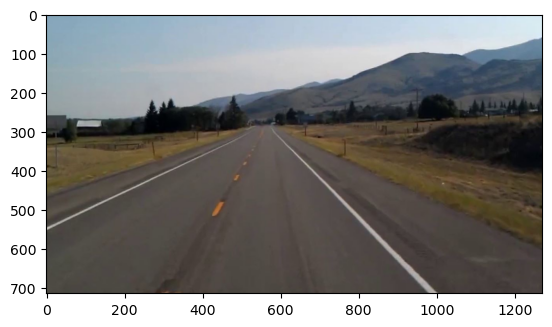

In [7]:
plt.imshow(image)

In [8]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [9]:
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (255, 0, 0), thickness=4)
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

In [10]:
region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [12]:
canny_image = cv2.Canny(gray_image, 100, 200)

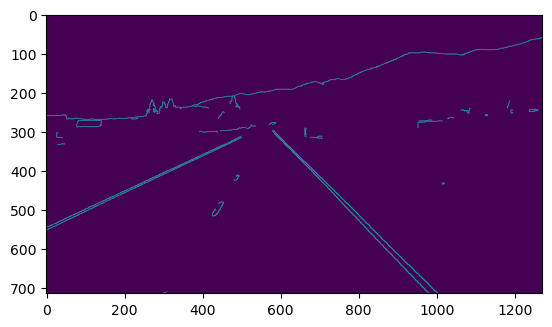

In [13]:
plt.imshow(canny_image)
plt.show()

In [14]:
cropped_image = region_of_interest(canny_image, 
                                   np.array([region_of_interest_vertices], np.int32),)

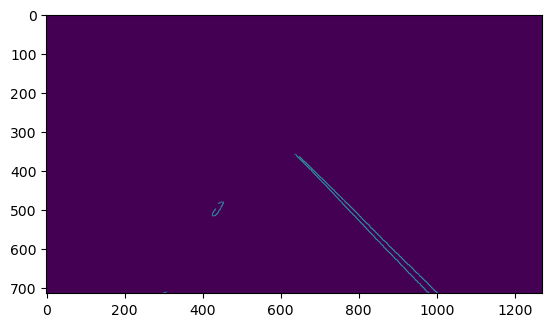

In [15]:
plt.imshow(cropped_image)
plt.show()

In [16]:
lines = cv2.HoughLinesP(cropped_image,
                        rho = 6,
                        theta = np.pi/60,
                        threshold = 160,
                        lines = np.array([]),
                        minLineLength=40,
                        maxLineGap = 25)


In [17]:
image_with_lines = draw_the_lines(image, lines)

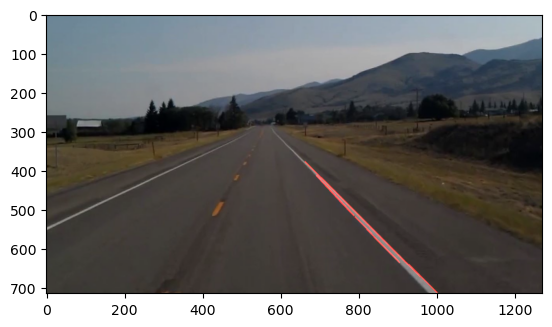

In [18]:
plt.imshow(image_with_lines)
plt.show()

In [19]:
# for videos

def process(image):
    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    canny_image = cv2.Canny(blurred_image, 150, 200)
    cropped_image = region_of_interest(canny_image, 
                                   np.array([region_of_interest_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,
                        rho = 2,
                        theta = np.pi/180,
                        threshold = 100,
                        lines = np.array([]),
                        minLineLength=100,
                        maxLineGap = 50)
    image_with_lines = draw_the_lines(image, lines)
    return image_with_lines
    

In [20]:
def process_video(input_video_path, output_video_path):
    cap = cv2.VideoCapture(input_video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            processed_frame = process(frame)
            out.write(processed_frame)
        else:
            break



In [25]:
cap = cv2.VideoCapture('Test1.mp4')
fourcc = cv2.VideoWriter_fourcc(*'XVID')

In [27]:
out = cv2.VideoWriter('Output.avi', fourcc, 20.0, (640,480))

In [29]:
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = process(frame)

    out.write(frame)
    cv2.imshow('frame', frame)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# On running the code the output window will be displayed 
# and to close the window press 'q'

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280